# FDA HW1 Part1

## Description
[HW1 Description](https://github.com/silenceliang/FDA_practice/blob/master/README.md)

# Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pd_data = pd.read_csv("data/reviews_reduced.csv")

In [3]:
pd_data = pd_data[:10000]

In [4]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
pd_data.shape

(10000, 10)

In [6]:
len(pd_data['UserId'].unique())

9015

# 1. Top-10 Reviewer

In [7]:
users = pd_data.groupby(['UserId', 'ProfileName'])
users = users['UserId', 'ProfileName', 'Score']
top10 = users.size().sort_values(ascending=False)
top10 = pd.DataFrame({'Score count':top10})
users = users.aggregate(np.sum).sort_values(by=['Score'], ascending=False)

In [8]:
top10 = top10.merge(users, on=['UserId','ProfileName'])[:10]
top10

,,Score count,Score
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,66
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,38
A35R32TA60XD57,M. Torma,9,37
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,40
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,31
A3NHUQ33CFH3VM,Citizen John,7,22
A3PJZ8TU8FDQ1K,Jared Castle,7,33
A3TX6CWSZL02PW,"LaVerne "":LaVerne""",6,30
AQQLWCMRNDFGI,Steven A. Peterson,6,25


In [9]:
top10['Score mean'] = top10['Score']/top10['Score count']
top10.drop(['Score'], axis=1, inplace=True)

In [10]:
top10

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
A3TX6CWSZL02PW,"LaVerne "":LaVerne""",6,5.000000
AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667


# 2. Plot score distribution for the user with the most number of reviews

<BarContainer object of 5 artists>

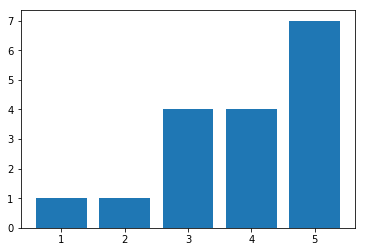

In [11]:
topusr = pd_data[pd_data['UserId'] == 'A1Z54EM24Y40LL']['Score']
y = [list(topusr).count(i) for i in range(1,6)]
plt.bar(range(1,6),y)

# 3. Plot pandas Series DataFrame (Time->Date)

In [12]:
Time = [datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S') for time in pd_data['Time']]
pd_data['Date'] = pd.to_datetime(Time, errors='coerce')
sumofday = pd_data.groupby('Date').agg(['count'])['Id']

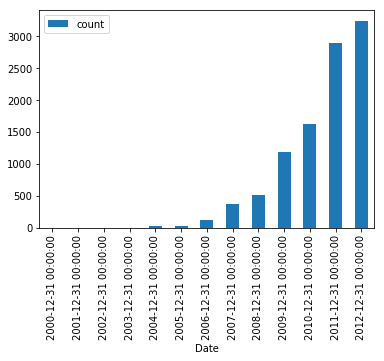

In [13]:
sumofday.resample('Y').sum().plot(kind='bar')

# 4. Plot HeatMap using seaborn

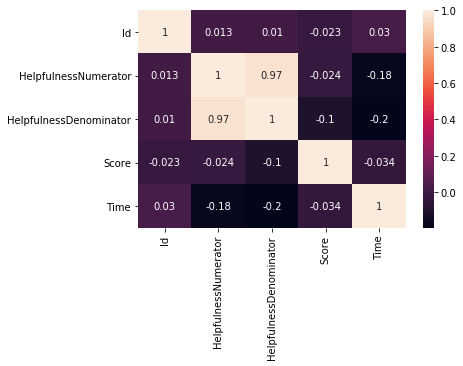

In [16]:
import seaborn as sns
df = pd_data.copy()
hm = sns.heatmap(df.corr(), annot=True)

# 5. Helpful percent

(array([4878.,    0.,    0.,    0.,    0.,  689.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

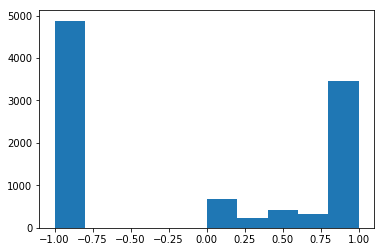

In [78]:
helpful = pd_data[pd_data['HelpfulnessNumerator'] <= pd_data['HelpfulnessDenominator']]
helpfulext = helpful.loc[helpful['HelpfulnessDenominator'] == 0,'HelpfulnessDenominator'] = -1
helpfulext = helpful[helpful['HelpfulnessDenominator'] == -1]['HelpfulnessDenominator']
helpful = helpful[helpful['HelpfulnessDenominator'] != -1]
helpfulPercent = helpful['HelpfulnessNumerator']/helpful['HelpfulnessDenominator']
helpfulPercent = helpfulPercent.append(helpfulext)
plt.hist(helpfulPercent)